## <font color="Greenyellow">Trabajo de Fin Master 2: Modelos base</font>
<a id="item0"></a> 

### <font color="Greenyellow">0. Indice</font>

* [1. Inicializacion del notebook](#item1)
* [2. ETL](#item2)
* [3. Modelos base](#item3)


***
<a id="item1"></a>
### <font color="Greenyellow">1. Inicializacion del notebook</font>

#### <font color="Greenyellow">1.1. Importacion de librerias</font>

In [7]:
# Analisis y transformacion de datos
import pandas as pd
import numpy as np
# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
# Base de datos
import sqlite3
# Funciones propias en carpeta 'funciones
import funciones.funciones as funciones
# funciones machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

#### <font color="Greenyellow">1.2. Parametros del notebook</font>

In [8]:
carpeta_base_datos = 'bbdd'
nombre_bbdd        = 'base_datos_tfm.db'
semilla = 12345
pct_test=0.20

***
<a id="item2"></a>
### <font color="Greenyellow">2. ETL</font>
[Volver al indice](#item0)

In [9]:
# importamos los datos
df = funciones.extraer_datos_fraude(carpeta_base_datos=carpeta_base_datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [10]:
# transformamos los datos y dividimos en train y test
X_train, X_test, y_train, y_test = funciones.preparar_datos(df, n_columnas_x=29, pct_test=pct_test, semilla=semilla)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (227845, 29), y_train shape: (227845,)
X_test shape: (56962, 29), y_test shape: (56962,)


***
<a id="item3"></a>
### <font color="Greenyellow">3. Modelos base</font>
[Volver al indice](#item0)

#### <font color="Greenyellow">3.1. Regresion logistica</font>

1. Entrenando el modelo...


c:\Users\Nitropc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


... entrenamiento completado.
    A. Precisión del modelo: 0.9758
    B. F1 Score: 0.1076
    C. AUC: 0.9726
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.9222
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56872
           1       0.06      0.92      0.11        90

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



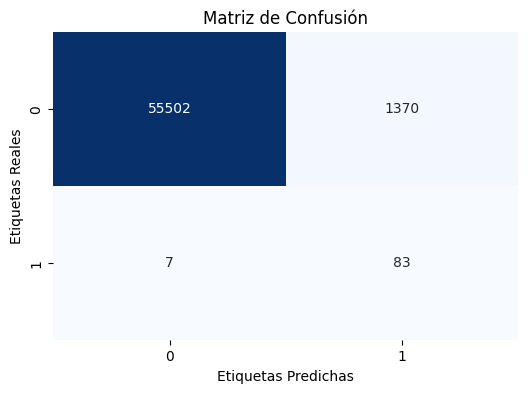


   Puntuaciones F1 de CV (k=5): [0.11285266 0.10843373 0.11446741 0.11868484 0.10783609]
   Promedio de F1 de CV: 0.1125


In [11]:
# 1. Instanciamos el modelo
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=semilla, n_jobs=-1)
# 2. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 3. Entrenamos el modelo
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 4. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.2. Regresion logistica bagging</font>

1. Entrenando el modelo...
... entrenamiento completado.
    A. Precisión del modelo: 0.9791
    B. F1 Score: 0.1226
    C. AUC: 0.9733
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.9222
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56872
           1       0.07      0.92      0.12        90

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



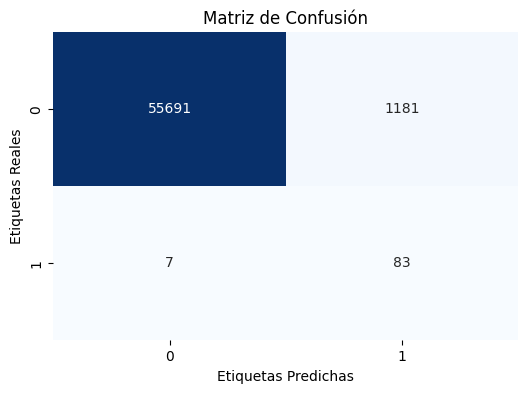


   Puntuaciones F1 de CV (k=5): [0.12938005 0.12653779 0.12765957 0.13012478 0.11708861]
   Promedio de F1 de CV: 0.1262


In [12]:
# 1. Instanciamos el modelo base (Regresión Logística)
base_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=semilla, n_jobs=-1)
# 2. Instanciamos el BaggingClassifier
model = BaggingClassifier(estimator=base_model,
                          n_estimators=10,
                          random_state=semilla,
                          n_jobs=-1)
# 3. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 4. Entrenamos el modelo de ensamble
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 5. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.3. Árbol de decisión sencillo</font>

1. Entrenando el modelo...
... entrenamiento completado.
    A. Precisión del modelo: 0.9993
    B. F1 Score: 0.7719
    C. AUC: 0.8665
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.7333
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.81      0.73      0.77        90

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



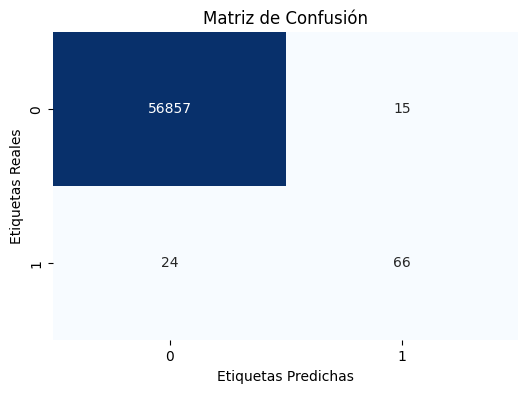


   Puntuaciones F1 de CV (k=5): [0.7388535  0.72847682 0.73939394 0.71515152 0.72      ]
   Promedio de F1 de CV: 0.7284


In [13]:
# 1. Instanciamos el modelo de Arbol de decision
model = DecisionTreeClassifier(class_weight='balanced', random_state=semilla)
# 2. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 3. Entrenamos el modelo
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 4. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.4. Random forest (tipo bagging)</font>

1. Entrenando el modelo...
... entrenamiento completado.
    A. Precisión del modelo: 0.9996
    B. F1 Score: 0.8623
    C. AUC: 0.9385
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.8000
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.94      0.80      0.86        90

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



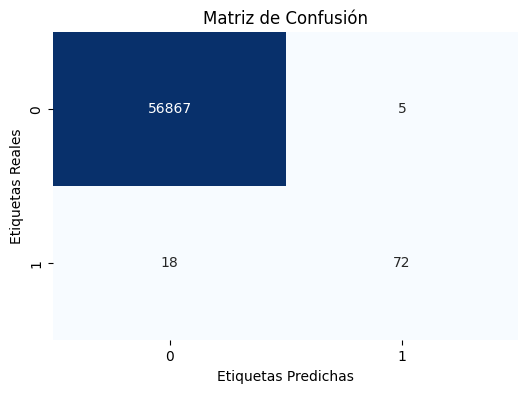


   Puntuaciones F1 de CV (k=5): [0.8028169  0.84137931 0.86666667 0.81081081 0.8       ]
   Promedio de F1 de CV: 0.8243


In [14]:
# 1. Instanciamos el modelo
model = RandomForestClassifier(n_estimators=20, random_state=semilla, n_jobs=-1)
# 2. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 3. Entrenamos el modelo
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 4. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.5. Adaboost (tipo boosting)</font>

1. Entrenando el modelo...
... entrenamiento completado.
    A. Precisión del modelo: 0.9991
    B. F1 Score: 0.7135
    C. AUC: 0.9730
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.6778
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.75      0.68      0.71        90

    accuracy                           1.00     56962
   macro avg       0.88      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



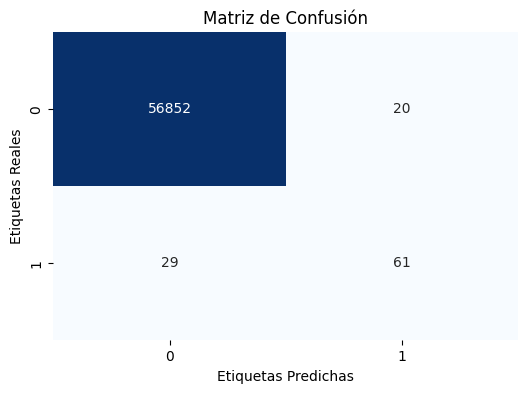


   Puntuaciones F1 de CV (k=5): [0.67586207 0.77707006 0.73333333 0.7114094  0.73076923]
   Promedio de F1 de CV: 0.7257


In [15]:
# 1. Instanciamos el modelo base (clasificador débil)
base_model = DecisionTreeClassifier(max_depth=1)
# 2. Instanciamos el AdaBoostClassifier
model = AdaBoostClassifier(estimator=base_model,
                           n_estimators=20,
                           random_state=semilla)
# 3. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 4. Entrenamos el modelo de ensamble
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 5. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.6. XGBoost (tipo boosting)</font>

1. Entrenando el modelo...
... entrenamiento completado.
    A. Precisión del modelo: 0.9996
    B. F1 Score: 0.8795
    C. AUC: 0.9435
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.8111
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.96      0.81      0.88        90

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



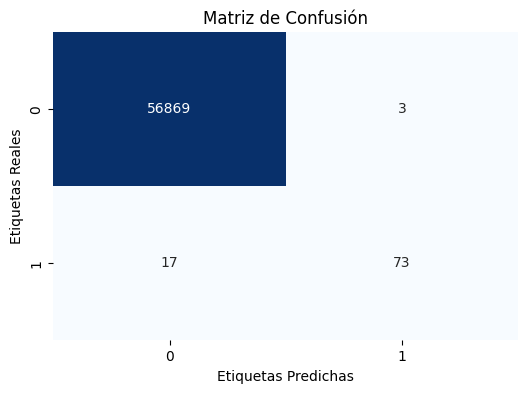


   Puntuaciones F1 de CV (k=5): [0.36241611 0.81012658 0.83660131 0.79470199 0.74666667]
   Promedio de F1 de CV: 0.7101


In [16]:
# 1. Instanciamos el modelo
model = xgb.XGBClassifier(n_estimators=20,
                          random_state=semilla,
                          n_jobs=-1,
                          eval_metric='logloss')
# 2. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 3. Entrenamos el modelo
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 4. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

#### <font color="Greenyellow">3.7. LightGBM (tipo boosting)</font>

1. Entrenando el modelo...
[LightGBM] [Info] Number of positive: 402, number of negative: 227443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001764 -> initscore=-6.338203
[LightGBM] [Info] Start training from score -6.338203
... entrenamiento completado.
    A. Precisión del modelo: 0.9732
    B. F1 Score: 0.0948
    C. AUC: 0.9198
    D. Recall (Sensibilidad) Clase Minoritaria (1): 0.8889
    E. Metricas desagregadas:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56872
           1       0.05      0.89      0.09        90

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted 

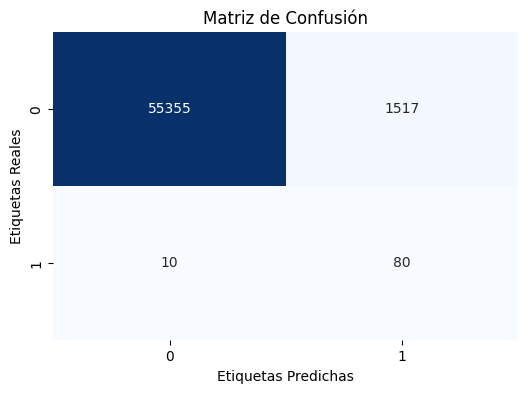


   Puntuaciones F1 de CV (k=5): [0.17669654 0.02430433 0.07054148 0.03455389 0.16008772]
   Promedio de F1 de CV: 0.0932


In [17]:
# 1. Instanciamos el modelo
model = lgb.LGBMClassifier(objective='binary',
                           is_unbalance=True,
                           n_estimators=20,
                           random_state=semilla,
                           n_jobs=-1)
# 2. Implementamos validación cruzada (CV) al modelo (5 pliegues)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# 3. Entrenamos el modelo
print("1. Entrenando el modelo...")
model.fit(X_train, y_train)
print("... entrenamiento completado.")
# 4. Evaluamos el modelo
accuracy, f1, auc, recall_minoritaria, metricas_desagregadas, c_matrix = funciones.evaluar_modelo(model, X_test, y_test)
print(f"\n   Puntuaciones F1 de CV (k=5): {cv_scores}")
print(f"   Promedio de F1 de CV: {np.mean(cv_scores):.4f}")

***
[Volver al indice](#item0)